In [1]:
import pandas as pd
import matplotlib.pyplot as plt


MeasurementName      SSA 3 Lysimeter UMP 120cm %  SSA 3 Lysimeter UMP 30cm %  \
MeasureDate                                                                    
2013-07-01 00:00:00                    32.700000                   25.170000   
2013-07-01 01:00:00                    32.680000                   25.160000   
2013-07-01 02:00:00                    32.625000                   25.165000   
2013-07-01 03:00:00                    32.625000                   25.067501   
2013-07-01 04:00:00                    32.633334                   25.030001   
...                                          ...                         ...   
2024-07-05 08:00:00                    23.795000                   26.892499   
2024-07-05 09:00:00                    23.762000                   26.804000   
2024-07-05 10:00:00                    23.773334                   26.756667   
2024-07-05 11:00:00                    23.715000                   26.760000   
2024-07-05 12:00:00                    2

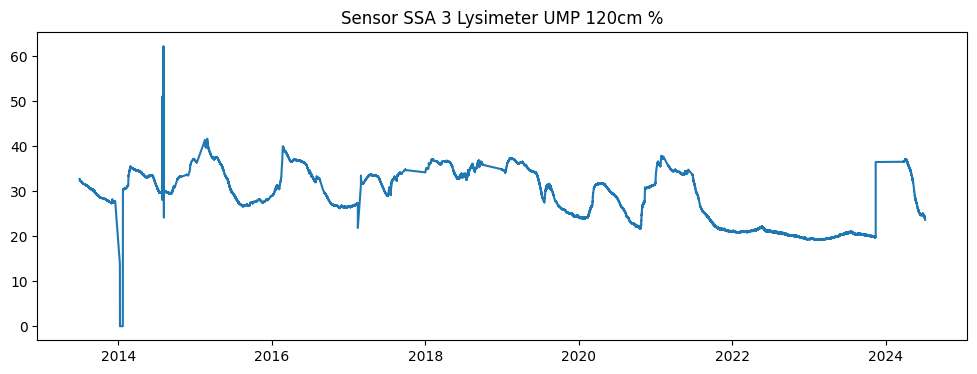

In [5]:
df = pd.read_parquet('../data/pivot_data_hourly.parquet')

df = df.dropna()
# Detect outliers in pivot_data_hourly using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Boolean DataFrame: True where outlier
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Print rows with any outlier in any column
print(df[outliers.any(axis=1)])


col = df.columns[0]  # Change to your sensor column name
plt.figure(figsize=(12,4))
plt.plot(df[col])
plt.title(f"Sensor {col}")
plt.show()

In [14]:
for col in df.columns:
    median = df[col].median()
    df[col] = df[col].mask(outliers[col], median)

In [16]:
# Recalculate outliers after replacement
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_after = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Rows with outliers after replacement:", outliers_after.any(axis=1).sum())

Rows with outliers after replacement: 0


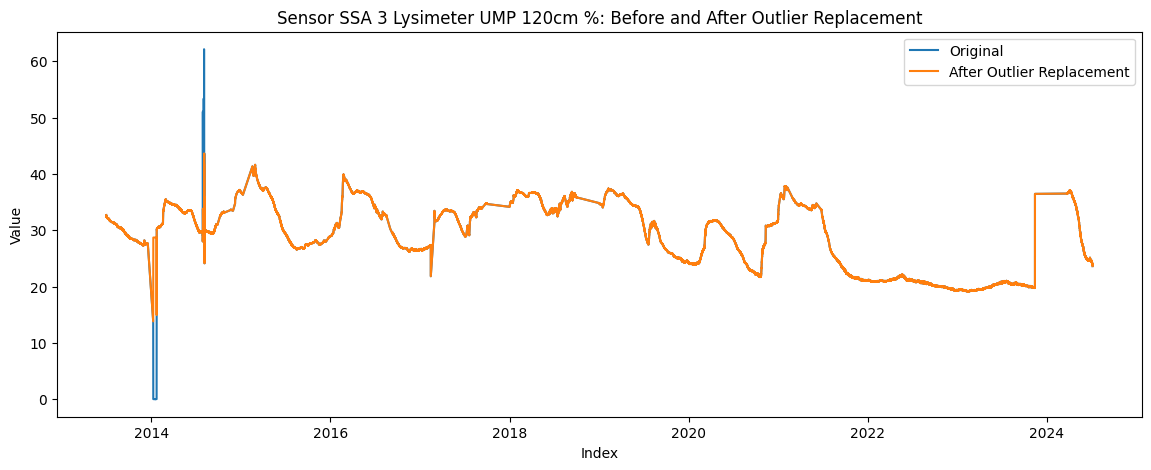

In [19]:
df_original = pd.read_parquet('../data/pivot_data_hourly.parquet').dropna()
plt.figure(figsize=(14, 5))
plt.plot(df_original[col], label='Original')
plt.plot(df[col], label='After Outlier Replacement')
plt.title(f"Sensor {col}: Before and After Outlier Replacement")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [20]:
df.to_parquet('../data/pivot_data_hourly_cleaned.parquet')